## Exploratory Data Analysis [ EDA ] - Ecommerce Purchases Dataset 

In [116]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

### Loading the Dataset



In [118]:
df = pd.read_csv("Ecommerce_Purchases.csv")

### Look at the dataset first 

In [120]:
df.head(2)

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73


**Observation ::**  
The dataset contains customer-related information such as email, job title, purchase price, and credit card details.


### Check how many rows and columns in dataset 

In [123]:
print("Number of rows ::",df.shape[0])
print("Number of column ::",df.shape[1])

Number of rows :: 10000
Number of column :: 14


- Rows represent individual customer purchases  
- Columns represent customer attributes and transaction details


In [125]:
df.dtypes

Address              object
Lot                  object
AM or PM             object
Browser Info         object
Company              object
Credit Card           int64
CC Exp Date          object
CC Security Code      int64
CC Provider          object
Email                object
Job                  object
IP Address           object
Language             object
Purchase Price      float64
dtype: object

In [126]:
df.isnull().sum()

Address             0
Lot                 0
AM or PM            0
Browser Info        0
Company             0
Credit Card         0
CC Exp Date         0
CC Security Code    0
CC Provider         0
Email               0
Job                 0
IP Address          0
Language            0
Purchase Price      0
dtype: int64

### Column Names 

In [128]:
df.columns

Index(['Address', 'Lot', 'AM or PM', 'Browser Info', 'Company', 'Credit Card',
       'CC Exp Date', 'CC Security Code', 'CC Provider', 'Email', 'Job',
       'IP Address', 'Language', 'Purchase Price'],
      dtype='object')

### Data Information 

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Address           10000 non-null  object 
 1   Lot               10000 non-null  object 
 2   AM or PM          10000 non-null  object 
 3   Browser Info      10000 non-null  object 
 4   Company           10000 non-null  object 
 5   Credit Card       10000 non-null  int64  
 6   CC Exp Date       10000 non-null  object 
 7   CC Security Code  10000 non-null  int64  
 8   CC Provider       10000 non-null  object 
 9   Email             10000 non-null  object 
 10  Job               10000 non-null  object 
 11  IP Address        10000 non-null  object 
 12  Language          10000 non-null  object 
 13  Purchase Price    10000 non-null  float64
dtypes: float64(1), int64(2), object(11)
memory usage: 1.1+ MB


 - Most columns are non-null  
- Data types are appropriate for analysis  
- No immediate missing value issue observed

### What are the  highest, lowest and AVG purchase price ?

Highest price  99.99
Lowest price  0.0
Average price  50.347302


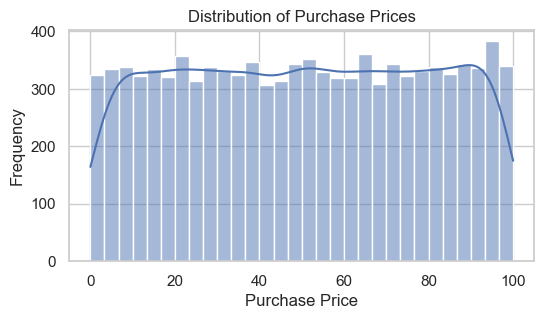

In [133]:
print("Highest price ",df['Purchase Price'].max())
print("Lowest price ",df['Purchase Price'].min())
print("Average price ",df['Purchase Price'].mean())

plt.figure(figsize=(6,3))
sns.histplot(df['Purchase Price'], bins=30, kde=True)
plt.title("Distribution of Purchase Prices")
plt.xlabel("Purchase Price")
plt.ylabel("Frequency")
plt.show()

- The highest purchase price represents the maximum amount spent by a customer
- The lowest purchase price shows the minimum transaction value
- The average purchase price gives an overall idea of customer spending behavior


### How many customers have French ("fr") as their language?

In [136]:
print("Number of customers have french as their language ::")
df[df["Language"]=='fr'].shape[0]

Number of customers have french as their language ::


1097

- The number of customers using French as their language is relatively low compared to other languages, indicating that the dataset is dominated by non-French users.


### How many customers have "Engineer" in their job title?

In [139]:
print("Number of customers have Engineer in their job title ::")
df[df['Job'].str.contains('engineer',case = False)].shape[0]

Number of customers have Engineer in their job title ::


984

### What is the email address associated with the IP address 132.207.160.22?

In [141]:
df[df['IP Address']=="132.207.160.22"][["Email","IP Address"]]

,Email,IP Address
2,amymiller@morales-harrison.com,132.207.160.22


### How many customers using Mastercard made purchases above $50

In [143]:
df["CC Provider"].unique()

array(['JCB 16 digit', 'Mastercard', 'Discover',
       'Diners Club / Carte Blanche', 'VISA 16 digit', 'VISA 13 digit',
       'American Express', 'Voyager', 'JCB 15 digit', 'Maestro'],
      dtype=object)

In [144]:
print("Number of customers using Mastercard and made purchases above $50 ::")
df[(df['CC Provider']=='Mastercard') & (df["Purchase Price"]>=50)].shape[0]

Number of customers using Mastercard and made purchases above $50 ::


405

#### Find the email of the person with the following Credit Card Number :: 4664825258997302c

In [146]:
df[df['Credit Card']==4664825258997302][["Email"]]

,Email
9992,bberry@wright.net


### How many people purchase during the AM and how many people purchase during PM?

In [148]:
df['AM or PM'].value_counts()

AM or PM
PM    5068
AM    4932
Name: count, dtype: int64

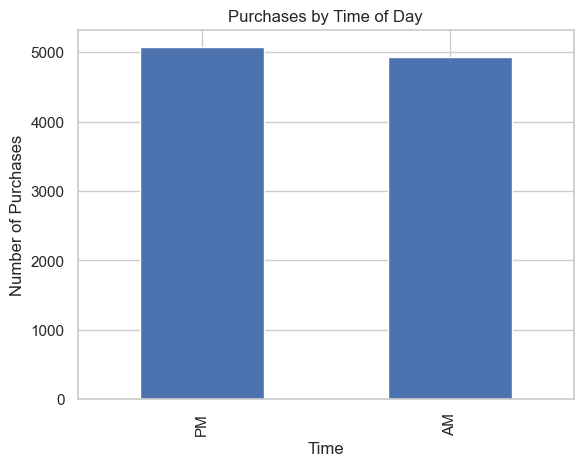

In [149]:
df['AM or PM'].value_counts().plot(kind='bar')
plt.title("Purchases by Time of Day")
plt.xlabel("Time")
plt.ylabel("Number of Purchases")
plt.show()

### How many people have a credit card that expires in 2020?

In [151]:
df["CC Exp Date"].unique()

array(['02/20', '11/18', '08/19', '02/24', '10/25', '07/25', '07/24',
       '06/25', '04/24', '01/17', '02/17', '06/26', '05/26', '01/25',
       '09/22', '04/25', '06/22', '01/26', '12/22', '03/22', '03/25',
       '07/22', '02/23', '07/18', '05/19', '03/19', '12/16', '11/24',
       '04/17', '01/20', '05/25', '01/21', '09/16', '09/20', '06/18',
       '12/20', '02/19', '08/20', '04/23', '08/24', '03/26', '05/24',
       '10/17', '08/17', '11/23', '09/19', '02/26', '01/24', '10/20',
       '05/20', '09/25', '11/21', '06/21', '07/23', '03/21', '12/23',
       '11/22', '01/18', '08/22', '08/25', '05/21', '06/17', '10/19',
       '01/22', '11/25', '08/23', '02/18', '12/24', '04/18', '02/25',
       '10/16', '07/17', '06/20', '08/18', '10/18', '09/21', '03/23',
       '03/24', '11/20', '06/19', '07/21', '10/24', '09/17', '09/18',
       '05/22', '12/19', '07/19', '01/23', '10/22', '11/16', '07/20',
       '12/25', '10/21', '05/17', '01/19', '02/22', '10/23', '03/20',
       '12/21', '11/

In [152]:
print("Number of credit card that expries in 2020 ::")
len(df[df["CC Exp Date"].str.contains('20')])

Number of credit card that expries in 2020 ::


988

### What are the top 5 most popular email providers [ e.g. gmail.com, yahoo.com, etc... ]

In [154]:
df['Email'].unique()

array(['pdunlap@yahoo.com', 'anthony41@reed.com',
       'amymiller@morales-harrison.com', ..., 'tyler16@gmail.com',
       'elizabethmoore@reid.net', 'rachelford@vaughn.com'], dtype=object)

In [155]:
df['Email_provider'] = df["Email"].str.split("@").str[1]
df["Email_provider"].value_counts().head()

Email_provider
hotmail.com     1638
yahoo.com       1616
gmail.com       1605
smith.com         42
williams.com      37
Name: count, dtype: int64

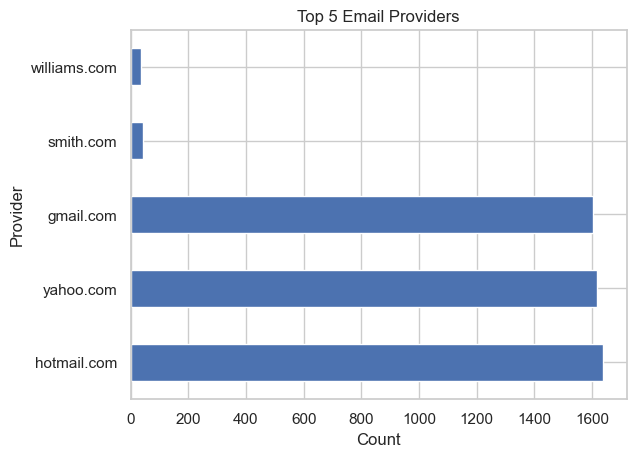

In [156]:
df['Email_provider'].value_counts().head(5).plot(kind='barh')
plt.title("Top 5 Email Providers")
plt.xlabel("Count")
plt.ylabel("Provider")
plt.show()

## Conclusion 

- The dataset contains customer purchase information including email, job title, language, purchase price, and payment details.
- Purchase price analysis shows variation in customer spending, with a clear difference between minimum, maximum, and average values.
- Customer activity is distributed across both AM and PM, indicating purchases occur throughout the day.
- Mastercard users with higher purchase amounts form a specific customer segment that can be useful for targeted analysis.
- Language and job title analysis highlights diversity in customer background, with technical and non-technical roles present.
- The dataset is clean and suitable for further analysis such as customer segmentation or predictive modeling.
